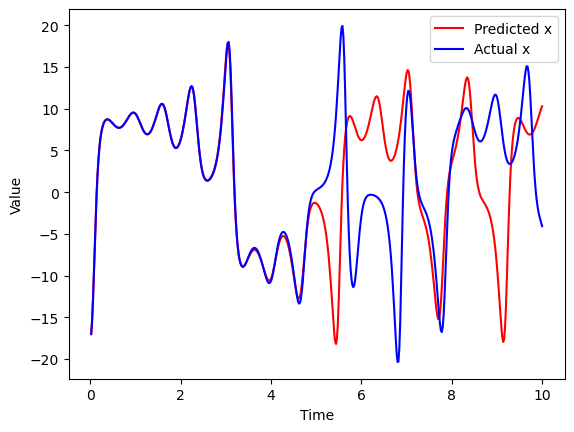

In [5]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

np.random.seed(0)

Dr = 300  # reservoir size
D = 3

mu = 1.2
lam = 0.000001

# Generate sparse reservoir matrix A1
A1 = sp.random(Dr, Dr, density=6/Dr, format='csr')
A1 = A1 - 0.5 * np.sign(A1.toarray())
A1 = A1 * mu / np.abs(sp.linalg.eigs(A1, k=1)[0])  # normalize reservoir matrix
A = sp.csr_matrix(A1)

Win = 0.01 * (2.0 * np.random.rand(Dr, D) - 1)

r = 0.5 - 1.0 * np.random.rand(Dr)


x, y, z = -2.9708, -5.1844, 12.1317

T = 100
dt = 0.02

ntraining = int(T / dt)

X = np.zeros((ntraining, D))
R = np.zeros((ntraining, Dr))

for t in range(ntraining):
    u = np.array([x, y, z])
    R[t, :] = r

    xp = 10 * (y - x)
    yp = x * (28 - z) - y
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp

    r = np.tanh(A.dot(r) + Win.dot(u) + 1)
    X[t, :] = u

w = X.T.dot(R).dot(np.linalg.inv(R.T.dot(R) + lam * np.eye(Dr)))

v = np.array([x, y, z])

nprediction = int(60 / dt)

xpre = np.zeros(nprediction)
ypre = np.zeros(nprediction)
zpre = np.zeros(nprediction)

xact = np.zeros(nprediction)
yact = np.zeros(nprediction)
zact = np.zeros(nprediction)

for t in range(nprediction):
    xp = 10 * (y - x)
    yp = x * (28 - z) - y
    zp = x * y - 2.66667 * z

    x += dt * xp
    y += dt * yp
    z += dt * zp

    r = np.tanh(A.dot(r) + Win.dot(v) + np.ones(Dr))
    v = w.dot(r)

    xpre[t] = v[0]
    ypre[t] = v[1]
    zpre[t] = v[2]

    xact[t] = x
    yact[t] = y
    zact[t] = z

times = dt * np.arange(1, nprediction + 1)

plt.figure()
plt.plot(times[0 : 500], xpre[0 : 500], 'r-', label='Predicted x')
plt.plot(times[0 : 500], xact[0 : 500],'b-', label='Actual x')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


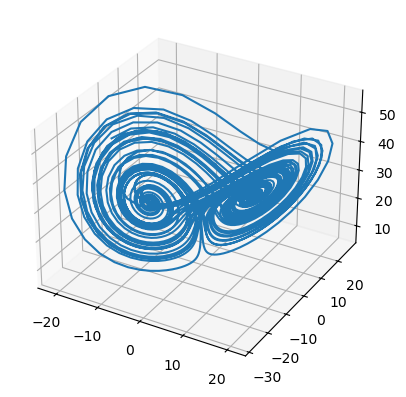

In [2]:
ax = plt.axes(projection = '3d')
ax.plot3D(xpre[:], ypre[:], zpre[:])
plt.show()


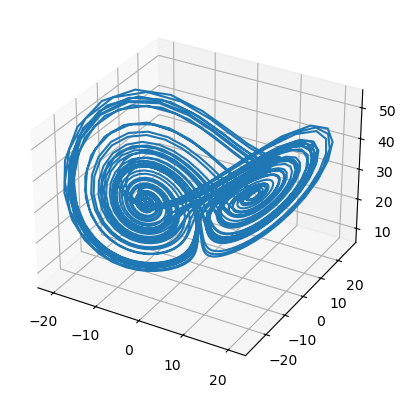

In [3]:
ax = plt.axes(projection = '3d')
ax.plot3D(xact[:], yact[:], zact[:])
plt.show()
